In [1]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [1]:
df=pd.read_excel('Car prices3.xlsx')

#show all columns in dataframe
pd.set_option('display.max_columns', None)


df.head(15)

NameError: name 'pd' is not defined

The features are Price,Brand,distance,year,model,owner and gas

# Statistical data analysis

In [3]:
df.describe(include='all')

,Price,year,BrandModel,distance,owner,Gas,Brand,Model
count,2289,2289.000000,2289,2289,2289,2289,2289,2283
unique,1841,NaN,134,2265,4,3,25,133
top,"4,50,000",NaN,Maruti Swift,"91,360 km",1st Owner,Petrol,Maruti,Swift
freq,9,NaN,210,2,1803,1280,1057,210
mean,NaN,2015.117082,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.856919,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

there are outliers and null values

there are both categorical and numerical values

In [ ]:
df.info()

# Graphical data analysis

In [ ]:
#year
df['year'].hist(figsize=(7,4),bins = 10,color='g')
plt.title("year")
plt.show()


In [ ]:
x =df["year"] 
y = df["Price"]


plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':2289})
plt.scatter(x, y, c='green', cmap='Spectral')
plt.colorbar()
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

There are cars from 2007 to 2021

Highest number of cars are between 2013 and 2019



In [ ]:


#Brand
df['Brand'].hist(figsize=(15,9),bins = 10,color='b')
plt.title("Brand")
plt.show()

In [ ]:
df.groupby('Brand').size().plot(kind='pie', autopct='%.2f')
plt.title("Brand",bbox={'facecolor':'0.8', 'pad':3})

In [ ]:
df['Brand'].value_counts()

Highest number of cars are of maruthi brand and then hyundai

In [ ]:
#Model
df['Model'].hist(figsize=(15,9),bins = 10,color='b')
plt.title("Model")
plt.show()

In [ ]:
df['Model'].value_counts()

Highest number of brands is of Swift

In [ ]:
df.groupby('Gas').size().plot(kind='pie', autopct='%.2f')
plt.title("Gas",bbox={'facecolor':'0.8', 'pad':3})

In [ ]:
x =df["Gas"] 
y = df["Price"]


plt.scatter(x, y, c='green', cmap='Spectral')
plt.colorbar()
plt.xlabel('Gas')
plt.ylabel('Price')
plt.show()

Highest number for cars are petrol driven

Price of car is lower for petrol+CNG

In [ ]:
df.groupby('owner').size().plot(kind='pie', autopct='%.2f')
plt.title("owner",bbox={'facecolor':'0.8', 'pad':3})

In [ ]:
x =df["owner"] 
y = df["Price"]


plt.scatter(x, y, c='green', cmap='Spectral')
plt.colorbar()
plt.xlabel('owner')
plt.ylabel('Price')
plt.show()

Maximum number for cars are of first owners

Maximum price is for 1st and 2nd owner cars

In [ ]:
x =df["distance"] 
y = df["Price"]


plt.scatter(x, y, c='green', cmap='Spectral')
plt.colorbar()
plt.xlabel('distance')
plt.ylabel('Price')
plt.show()

With the number of distance covered, the price of the car is seen to increase

# Feature Selection

In [ ]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

# EDA

In [4]:
#removing km
#removing ₹ from Price
df[['distances', 'km']] = df['distance'].str.split(' ', 1, expand=True)
df.drop(columns=["distance"],inplace=True)

In [5]:
df.drop(columns=["km"],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       2289 non-null   object
 1   year        2289 non-null   int64 
 2   BrandModel  2289 non-null   object
 3   owner       2289 non-null   object
 4   Gas         2289 non-null   object
 5   Brand       2289 non-null   object
 6   Model       2283 non-null   object
 7   distances   2289 non-null   object
dtypes: int64(1), object(7)
memory usage: 143.2+ KB


Integer values are in form of string which needs to be converted

In [7]:
#remove , from Price
df['Price'] = df['Price'].str.replace(r',', '')


In [8]:
#remove , from distances
df['distances'] = df['distances'].str.replace(r',', '')

In [9]:
#converting price into integer format
df["Price"] = df["Price"].astype(str).astype(int)
df["distances"] = df["distances"].astype(str).astype(int)

In [10]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the label  column
df["year"]=lab_enc.fit_transform(df['year'])
df["year"]

0        9
1        7
2       10
3       12
4        9
        ..
2284     7
2285    13
2286    12
2287    11
2288     4
Name: year, Length: 2289, dtype: int64

In [11]:
#Checking null values
df.isnull().sum()

Price         0
year          0
BrandModel    0
owner         0
Gas           0
Brand         0
Model         6
distances     0
dtype: int64

In [12]:
df["Model"].fillna(df["Model"].mode()[0],inplace=True)

In [13]:

x=df.drop(["Price"],axis=1)
y=df["Price"]

#one hot encoding on data
x=pd.get_dummies(x)
x

,year,distances,BrandModel_ Audi A,BrandModel_ Audi Q,BrandModel_ BMW,BrandModel_ BMW Mini,BrandModel_ BMW X,BrandModel_ Chevrolet Aveo U VA,BrandModel_ Chevrolet Beat,BrandModel_ Chevrolet Cruze,BrandModel_ Chevrolet Enjoy,BrandModel_ Chevrolet Sail,BrandModel_ Chevrolet Spark,BrandModel_ Datsun Go,BrandModel_ Datsun Go Plus,BrandModel_ Datsun Redi Go,BrandModel_ Fiat Grand Punto,BrandModel_ Fiat Punto EVO,BrandModel_ Ford Ecosport,BrandModel_ Ford Endeavour,BrandModel_ Ford FREESTYLE,BrandModel_ Ford Fiesta,BrandModel_ Ford Figo,BrandModel_ Ford Figo Aspire,BrandModel_ Ford New Figo,BrandModel_ Honda Accord,BrandModel_ Honda Amaze,BrandModel_ Honda Brio,BrandModel_ Honda CRV,BrandModel_ Honda City,BrandModel_ Honda City ZX,BrandModel_ Honda Civic,BrandModel_ Honda Jazz,BrandModel_ Honda Mobilio,BrandModel_ Honda WR-V,BrandModel_ Hyundai AURA,BrandModel_ Hyundai Accent,BrandModel_ Hyundai Creta,BrandModel_ Hyundai Elite i,BrandModel_ Hyundai Eon,BrandModel_ Hyundai GRAND I,BrandModel_ Hyundai Grand i,BrandModel_ Hyundai NEW SANTRO,BrandModel_ Hyundai New Elantra,BrandModel_ Hyundai Santa Fe,BrandModel_ Hyundai Santro Xing,BrandModel_ Hyundai Tucson New,BrandModel_ Hyundai VENUE,BrandModel_ Hyundai Verna,BrandModel_ Hyundai XCENT PRIME,BrandModel_ Hyundai Xcent,BrandModel_ Hyundai i,BrandModel_ ISUZU D-Max V Cross,BrandModel_ ISUZU MU-,BrandModel_ Jaguar XF,BrandModel_ Jeep Compass,BrandModel_ KIA SELTOS,BrandModel_ KIA SONET,BrandModel_ MG HECTOR,BrandModel_ MG HECTOR PLUS,BrandModel_ Mahindra Bolero,BrandModel_ Mahindra Kuv,BrandModel_ Mahindra MARAZZO,BrandModel_ Mahindra Quanto,BrandModel_ Mahindra Scorpio,BrandModel_ Mahindra TUV,BrandModel_ Mahindra Thar,BrandModel_ Mahindra XUV,BrandModel_ Mahindra XUV,BrandModel_ Maruti A Star,BrandModel_ Maruti Alto,BrandModel_ Maruti Alto,BrandModel_ Maruti Alto K,BrandModel_ Maruti Baleno,BrandModel_ Maruti Celerio,BrandModel_ Maruti Ciaz,BrandModel_ Maruti Dzire,BrandModel_ Maruti Eeco,BrandModel_ Maruti Ertiga,BrandModel_ Maruti Grand Vitara,BrandModel_ Maruti IGNIS,BrandModel_ Maruti New Wagon-R,BrandModel_ Maruti OMNI E,BrandModel_ Maruti Ritz,BrandModel_ Maruti S Cross,BrandModel_ Maruti S PRESSO,BrandModel_ Maruti SX,BrandModel_ Maruti Swift,BrandModel_ Maruti Swift Dzire,BrandModel_ Maruti Vitara Brezza,BrandModel_ Maruti Wagon R,BrandModel_ Maruti Wagon R,BrandModel_ Maruti Wagon R Stingray,BrandModel_ Maruti XL,BrandModel_ Maruti Zen Estilo,BrandModel_ Mercedes Benz C Class,BrandModel_ Mercedes Benz E Class,BrandModel_ Mercedes Benz GLA Class,BrandModel_ Mitsubishi Pajero Sport,BrandModel_ Nissan Kicks,BrandModel_ Nissan MAGNITE,BrandModel_ Nissan Micra,BrandModel_ Nissan Sunny,BrandModel_ Nissan Terrano,BrandModel_ Renault Duster,BrandModel_ Renault Fluence,BrandModel_ Renault Kwid,BrandModel_ Renault Scala,BrandModel_ Renault TRIBER,BrandModel_ Skoda Rapid,BrandModel_ Skoda Superb,BrandModel_ Ssangyong Rexton,BrandModel_ Tata Indigo ECS,BrandModel_ Tata Manza,BrandModel_ Tata NEXON,BrandModel_ Tata Nano,BrandModel_ Tata Safari Storme,BrandModel_ Tata TIGOR,BrandModel_ Tata Tiago,BrandModel_ Tata Xenon XT,BrandModel_ Tata Zest,BrandModel_ Toyota Camry,BrandModel_ Toyota Corolla Altis,BrandModel_ Toyota Etios,BrandModel_ Toyota Etios Liva,BrandModel_ Toyota Fortuner,BrandModel_ Toyota Glanza,BrandModel_ Toyota Innova,BrandModel_ Toyota Innova Crysta,BrandModel_ Toyota YARIS,BrandModel_ Volkswagen Ameo,BrandModel_ Volkswagen Jetta,BrandModel_ Volkswagen Passat,BrandModel_ Volkswagen Polo,BrandModel_ Volkswagen Vento,BrandModel_ Volvo XC,owner_1st Owner,owner_2nd Owner,owner_3rd Owner,owner_4th Owner,Gas_Diesel,Gas_Petrol,Gas_Petrol + CNG,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Jaguar,Brand_Jeep,Brand_KIA,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Mitsubishi,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Ssangyong,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Model_A,Model_A Star,M

In [14]:
len(x.columns)

301

# PCA

In [15]:
# #standardising the data for PCA

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([  1.30592112,   2.55909824,   3.66058462,   4.73265269,
         5.76283185,   6.78947989,   7.80786596,   8.82194742,
         9.83305348,  10.83812539,  11.84145154,  12.84338301,
        13.84449678,  14.84439437,  15.84355409,  16.84187525,
        17.83994797,  18.83774747,  19.83546171,  20.8330147 ,
        21.8303341 ,  22.82754728,  23.82469571,  24.73154164,
        25.63439778,  26.4966695 ,  27.26204211,  28.00534457,
        28.72207502,  29.42980956,  30.1263296 ,  30.82061732,
        31.51300959,  32.20239143,  32.89156829,  33.57854964,
        34.26376216,  34.94611769,  35.62747543,  36.3081932 ,
        36.98718189,  37.66398456,  38.34025668,  39.01572484,
        39.68989812,  40.36348121,  41.036486  ,  41.70848043,
        42.38040389,  43.05201038,  43.72279187,  44.39318537,
        45.06340599,  45.73322863,  46.40259303,  47.07155716,
        47.74010604,  48.40840024,  49.07661243,  49.74474193,
        50.412649  ,  51.08039597,  51.74802952,  52.41

In [16]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  127


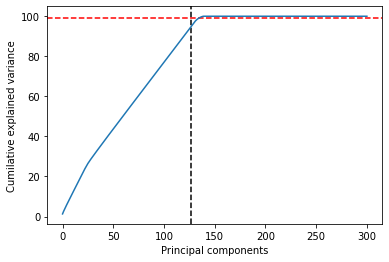

In [17]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [18]:
# Creating final dataset with 2136 columns

FinalPCA=PCA(n_components=127)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
0,-1.052583,-1.894016,-0.780067,-0.391052,0.049198,-0.003565,0.069097,-0.034539,-0.018820,0.041932,-0.000596,-0.013239,-0.019483,-0.023420,-0.008090,0.002886,-0.004134,-0.004713,-0.006569,-0.002851,0.001005,-0.001158,-0.000103,0.527613,-0.029336,0.407897,-1.676953,-0.448730,-3.631508,0.018627,0.068470,-0.190207,-0.265019,-0.052670,-0.508147,-0.464494,0.250861,-0.125730,0.063925,0.214772,0.000087,-0.079037,0.053271,0.082648,-0.012401,-0.013968,0.002761,0.022182,-0.061111,-0.018355,0.031069,0.029705,-0.040588,-0.120678,0.004485,-0.013546,-0.083772,0.003688,-0.044286,-0.015561,-0.038913,-0.019124,0.002522,0.017710,-0.005755,-0.000837,-0.000714,-0.004889,-0.001789,0.014628,-0.016112,0.020037,0.014337,-0.010136,0.007043,-0.029413,-0.014548,0.016665,0.012776,-0.006325,0.016410,0.001988,-0.019400,0.005578,0.003499,-0.007859,0.007306,0.012074,-0.006043,-0.001599,-0.005069,-0.002926,0.004409,-0.005234,0.002408,-0.000049,0.001312,0.006965,0.007787,-0.001075,-0.000521,0.001843,-0.000317,0.002560,-0.006081,-0.013078,0.003354,-0.012129,-0.003696,-0.001490,-0.009517,0.005029,-0.005051,-0.004706,0.001875,-0.000787,0.000996,-0.007048,-0.002505,0.000317,-0.002169,-0.004976,-0.006977,-0.004639,-0.004999,-0.001065,0.003060
1,-2.399212,-1.373905,-0.655420,-0.204855,0.095695,0.001165,0.087435,-0.006700,0.162283,0.063971,0.049181,-0.033313,0.056641,0.004375,-0.045328,-0.029464,-0.019273,-0.001581,-0.009699,-0.007749,-0.007012,-0.006947,0.002353,-1.520789,-0.689266,0.448055,0.059828,0.605313,0.365857,0.048690,-0.367763,-0.525108,-0.394823,-0.680403,-3.030320,5.594630,-0.264713,-3.110305,-0.273600,0.271908,0.732208,0.476706,0.027515,0.792663,0.529382,-0.425891,-0.618017,0.110302,-0.128421,0.138808,-0.025601,0.081141,-0.195266,-0.184572,-0.557490,0.056462,0.015853,0.013481,-0.040825,-0.067459,-0.154828,-0.105853,-0.073261,0.037810,-0.107854,-0.076754,-0.192925,-0.003637,-0.011898,0.020590,-0.174461,0.042620,0.038034,0.012405,0.012042,0.039048,-0.028916,-0.035353,0.039229,0.034172,0.021332,-0.018812,-0.016802,0.021440,0.029173,-0.001051,0.003416,-0.018779,0.006930,0.001519,-0.003556,-0.000483,-0.000335,-0.015698,-0.009073,-0.001527,0.001361,0.000349,-0.012491,-0.014358,-0.009842,0.010064,-0.000312,0.011116,0.043238,-0.046034,0.014339,0.003063,0.006724,-0.012128,-0.000161,-0.025765,-0.001393,0.025648,0.004466,0.000220,-0.003883,0.013601,-0.008537,-0.009961,-0.000918,-0.027566,-0.008658,0.000212,-0.016894,-0.007142,0.006225
2,-2.513316,-1.533472,-0.385405,-0.158148,0.092429,-0.031840,0.036579,-0.035079,0.186897,0.098624,0.066006,-0.039109,0.043559,0.007100,-0.038983,-0.028945,-0.016939,0.005440,-0.006053,-0.008899,-0.007414,-0.005339,-0.000050,-1.632486,-0.457889,0.534557,0.213537,0.668009,0.317468,0.040018,-0.322067,-0.513413,-0.401268,-0.697661,-3.008426,5.589170,-0.264838,-3.137936,-0.243716,0.256210,0.719275,0.486992,0.026114,0.774159,0.557528,-0.404955,-0.621846,0.118410,-0.143978,0.135132,-0.022261,0.089367,-0.189247,-0.191377,-0.551806,0.067489,0.015161,0.016779,-0.040299,-0.069535,-0.152322,-0.106869,-0.073415,0.042088,-0.107814,-0.077052,-0.188388,-0.004217,-0.012436,0.018381,-0.168482,0.042139,0.042823,0.012744,0.014770,0.036731,-0.029112,-0.036264,0.039343,0.033864,0.019086,-0.020342,-0.015745,0.021847,0.029610,-0.002116,0.003327,-0.019716,0.008381,-0.000240,-0.002026,0.001412,-0.002647,-0.016098,-0.008842,-0.001287,0.000921,0.000646,-0.010271,-0.011918,-0.006897,0.009761,-0.000157,0.011379,0.044088,-0.046302,0.015071,0.003061,0.004609,-0.013596,0.000485,-0.027504,-0.002675,0.026169,0.004185,0.001300,-0.003863,0.013145,-0.009808,-0.009789,-0.001926,-0.

In [19]:
x=FinalData2

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Columns: 127 entries, 0 to 126
dtypes: float64(127)
memory usage: 2.2 MB


In [21]:
len(y)

2289

# 1.Modeling with label 

# Splitting data

In [36]:

#scaling/Standardisation
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

# Finding best random state

In [37]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.7342616342440248 on Random State 148


# Testing various models

In [24]:
x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=148)

In [25]:
#Linear Regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))

r2 score of LinearRegression model is 0.6953670023855376


In [26]:
#DecisionTreeClassifier

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predlr=dt.predict(x_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))

r2 score of DecisionTreeRegressor model is 0.7455511800964669


In [27]:
#Random forest regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predlr=rf.predict(x_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))

r2 score of RandomForestRegressor model is 0.7983239536048019


In [28]:
#Gradient Boosting Regressor
gbm=GradientBoostingRegressor()
gbm.fit(x_train,y_train)
predlr=gbm.predict(x_test)
print("r2 score of GradientBoostingRegressor model is",r2_score(y_test,predlr))

r2 score of GradientBoostingRegressor model is 0.8147104973979358


In [29]:
#AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
predlr=ada.predict(x_test)
print("r2 score of AdaBoostRegressor model is",r2_score(y_test,predlr))

r2 score of AdaBoostRegressor model is 0.4888461259130641


# Cross validation

In [30]:
#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr1=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr1.mean())

scr2=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr2.mean())

scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr3.mean())

scr4=cross_val_score(gbm,x,y,cv=5)
print("Cross validation score of GradientBoostingRegressor model :", scr4.mean())

scr5=cross_val_score(ada,x,y,cv=5)
print("Cross validation score of AdaBoostRegressor model :", scr5.mean())


Cross validation score of Linear Regression model : -1424.5913631472279
Cross validation score of Decision Tree model : 0.6696542628540716
Cross validation score of Random Forest model : 0.7723029176569506
Cross validation score of GradientBoostingRegressor model : 0.7622422036308306
Cross validation score of AdaBoostRegressor model : 0.30833002667074244


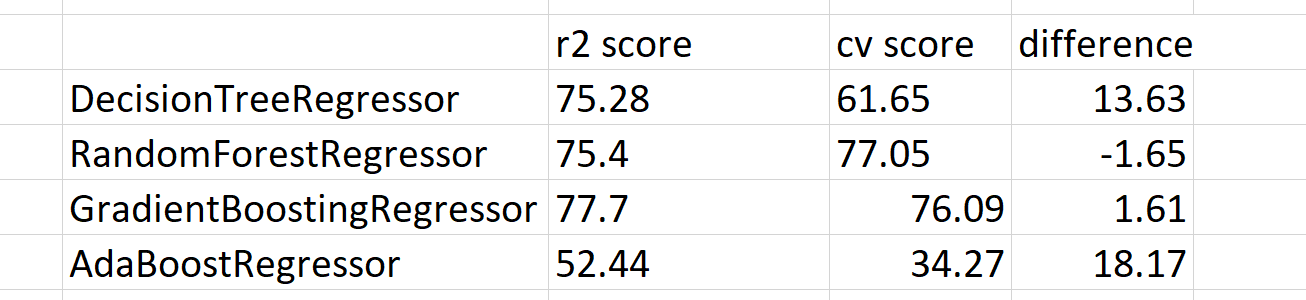

The least difference between r2 score and cv score is for GradientBoostingRegressor, hence it is selected for modelling

# Hyper parameter tuning

In [31]:
#GradientBoostingRegressor
parameters={'loss':['squared_error', 'ls', 'absolute_error'],
            'learning_rate':[1,2,3],
            'n_estimators':[1,2,3],
            'subsample':[1,2,3],
            'criterion':['friedman_mse', 'squared_error'],
            'min_samples_split':[1,2,3],
            'min_samples_leaf':[1,2,3]
}

In [32]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=4)

In [33]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [1, 2, 3],
                         'loss': ['squared_error', 'ls', 'absolute_error'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [1, 2, 3], 'subsample': [1, 2, 3]})

In [34]:
GCV.best_estimator_

GradientBoostingRegressor(learning_rate=1, min_samples_split=3, n_estimators=3,
                          subsample=1)

In [38]:
mod=GradientBoostingRegressor(learning_rate=1,n_estimators=3,subsample=1,min_samples_split=3)

In [39]:
regression2=GradientBoostingRegressor()
regression2.fit(x_train,y_train)

GradientBoostingRegressor()

# Saving of model

In [41]:
#saving GradientBoostingRegressor model
GradientBoostingRegressor_model2=GradientBoostingRegressor()
GradientBoostingRegressor_model2.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(GradientBoostingRegressor_model2,open(filename,'wb'))

#Adjusted R2
GradientBoostingRegressor_model2.score(x_train,y_train)

0.9515383018681569

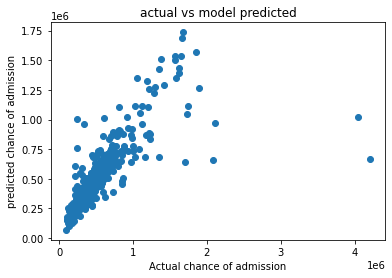

In [42]:
y_pred=regression2.predict(x_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

# Model evaluation

In [44]:
#Adjusted R2
GradientBoostingRegressor_model2.score(x_train,y_train)

0.9515383018681569